In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
%matplotlib inline

In [81]:
data= pd.read_csv(r"C:\Users\hemch\Downloads\Titanic Data Set\titanic_train.csv")

In [82]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

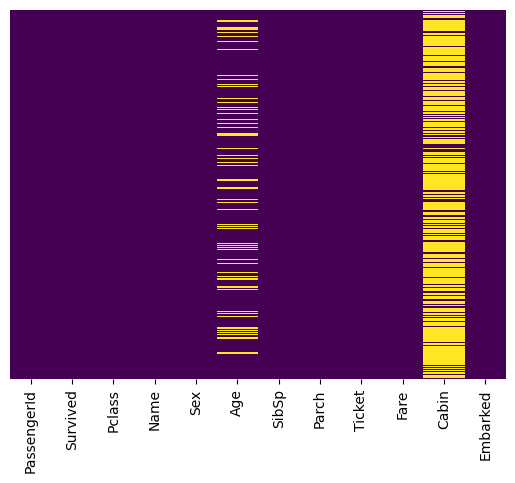

In [83]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

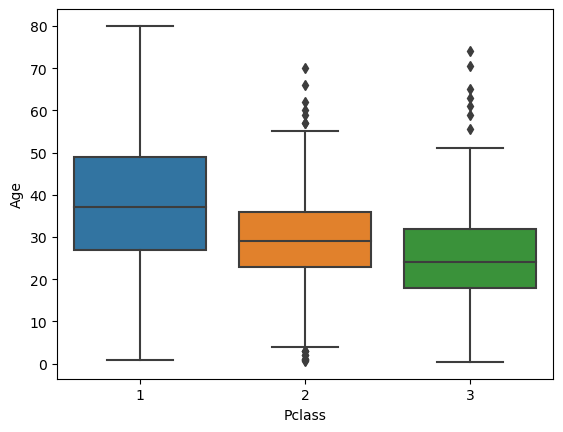

In [84]:
sns.boxplot(x='Pclass',y='Age',data=data)

In [85]:
def impute_age(x):
    Age = x[0]
    Pclass = x[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [86]:
data['Age']= data[['Age','Pclass']].apply(impute_age,axis=1)

In [87]:
data.drop('Cabin',axis=1,inplace=True)

In [88]:
data.dropna(inplace=True)

In [89]:
sex= pd.get_dummies(data['Sex'],drop_first=True)

In [90]:
embarked = pd.get_dummies(data['Embarked'],drop_first=True)

In [91]:
data= pd.concat([data,sex,embarked],axis=1)

In [100]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [93]:
data.drop('Sex',axis=1,inplace=True)

In [94]:
data.drop('Embarked',axis=1,inplace=True)

In [96]:
data.drop(['Name','Ticket'],axis=1,inplace = True)

In [99]:
data.drop('PassengerId',axis=1,inplace=True)

In [103]:
pclass=pd.get_dummies(data['Pclass'],drop_first=True)

In [104]:
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [105]:
data=pd.concat([data,pclass],axis=1)

In [108]:
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [107]:
data.drop('Pclass',axis=1,inplace=True)

In [112]:
X= data.drop('Survived',axis=1)

In [113]:
y= data['Survived']

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [124]:
from sklearn.preprocessing import binarize
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats
import statsmodels.api as sm

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [138]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

C:\Users\hemch\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hemch\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hemch\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [139]:
log_reg = LogisticRegression()

In [140]:
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [141]:
Predictions=log_reg.predict(X_test_scaled)

In [142]:
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [143]:
print(confusion_matrix(y_test,Predictions))

[[150  13]
 [ 33  71]]


In [144]:
#predictions Probability
Predictions_prob = log_reg.predict_proba(X_test)[:,1]
print(Predictions_prob[0])

3.65328404976209e-07


C:\Users\hemch\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


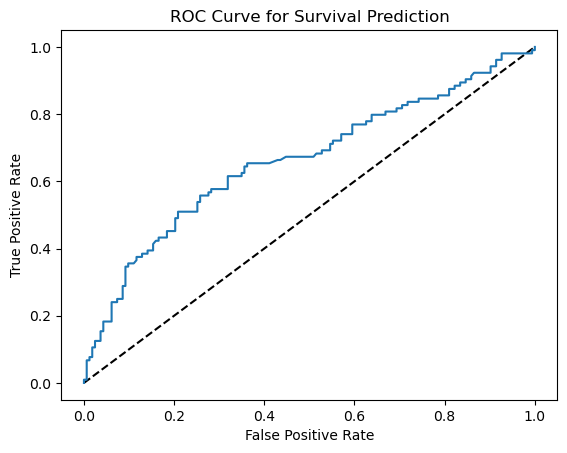

In [145]:

# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test,Predictions_prob)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Survival Prediction')
plt.show()


In [146]:
print(roc_auc_score(y_test,Predictions_prob))

0.6626061821613969
